# Libraries

In [9]:
import pandas as pd
import numpy as np
import glob
import os
import time
# plot feature and overall percent variance
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

# Data Set Original Structure 

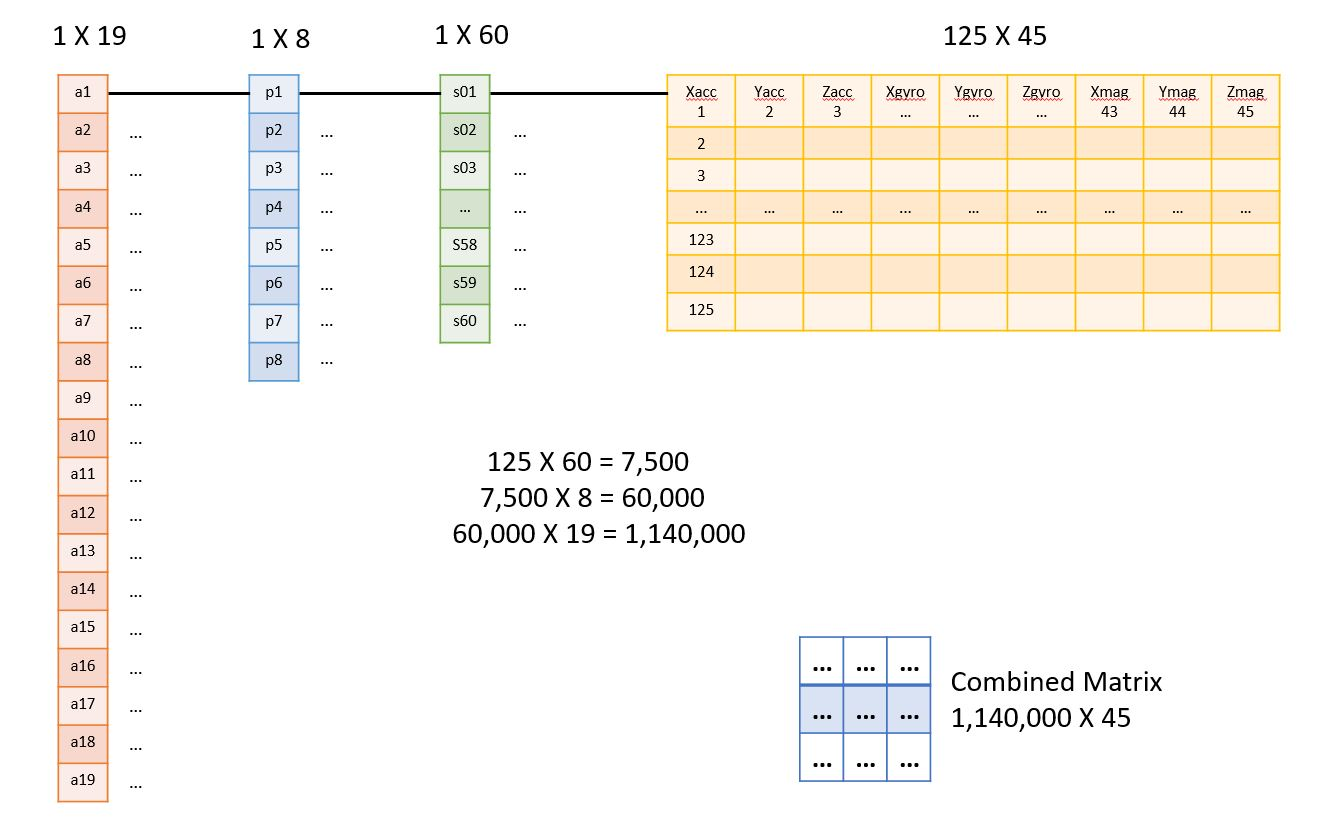

In [2]:
display.Image(
    'C:/Users/PazNe/CMPE_255_Data_Mining/Team5/code/RawDataSet.png'
)

## The 19 activities are:

# Loading data set from a01 to a19 for all subjects (p1 to p9) and all segments (s01 to s60) into a single Matrix

In [10]:
complete_data = pd.DataFrame()
start = time.time()
for i in range(1,20):
    
    if i < 10:
        activity_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/a0'+ str(i))
        a='a0'+str(i)
    else:
        activity_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/a'+ str(i))    
        a='a'+str(i)
        
    for j in range(1, 9):
        person_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/'+ a +'/p'+str(j))
        p='p'+str(j)
        for file in person_folder:
            filepath = 'C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/'+a+'/'+p+'/'+ file
    
            data = pd.read_csv(filepath, header=None)
        
            #Adding Column 46 to Include the Activity Number corresponding to each Row.
            data[45]=i
            complete_data=complete_data.append(data)
    print('Matrix shape after Combining: '+a ,complete_data.shape)
end = time.time()
duration_with_svd = end-start
print("Time taken to compile data set into a sigle matrix: %d seconds" %duration_with_svd)

Matrix shape after Combining: a01 (60000, 46)
Matrix shape after Combining: a02 (120000, 46)
Matrix shape after Combining: a03 (180000, 46)
Matrix shape after Combining: a04 (240000, 46)
Matrix shape after Combining: a05 (300000, 46)
Matrix shape after Combining: a06 (360000, 46)
Matrix shape after Combining: a07 (420000, 46)
Matrix shape after Combining: a08 (480000, 46)
Matrix shape after Combining: a09 (540000, 46)
Matrix shape after Combining: a10 (600000, 46)
Matrix shape after Combining: a11 (660000, 46)
Matrix shape after Combining: a12 (720000, 46)
Matrix shape after Combining: a13 (780000, 46)
Matrix shape after Combining: a14 (840000, 46)
Matrix shape after Combining: a15 (900000, 46)
Matrix shape after Combining: a16 (960000, 46)
Matrix shape after Combining: a17 (1020000, 46)
Matrix shape after Combining: a18 (1080000, 46)
Matrix shape after Combining: a19 (1140000, 46)
Time taken to compile data set into a sigle matrix: 601 seconds


## Features Identification:

* T = torso
* RA = Right arm
* LA = Left arm
* RL = Right leg
* LL = Left leg
* x, y, z = Axes 
* acc = Accelerometer
* gyro = Gyroscope
* mag = Magnetometer


In [11]:
#Labels for Columns: 
complete_data.columns=['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro','T_ygyro','T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro','RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro','LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro','RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro','LL_ygyro','LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag', 'Activity']

In [31]:
# Data collected by the 45 sensors for the 19 Activities done by the 8 people.
complete_data

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
0,8.13050,1.03490,5.42170,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.157300,0.70097,...,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730,1
1,8.13050,1.02020,5.38430,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.158900,0.71829,...,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514,1
2,8.16040,1.02010,5.36220,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.158790,0.69849,...,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219,1
3,8.16030,1.00520,5.37700,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.159120,0.72799,...,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750,1
4,8.16050,1.02750,5.34730,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.159160,0.71572,...,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,16.00800,-2.01660,-0.58220,2.027100,1.656800,0.584410,-0.73195,-0.476070,-0.013494,16.43100,...,-10.7520,4.3231,-4.5931,-0.230600,0.180890,-2.082300,0.56876,0.39409,0.518170,19
121,8.28230,-0.69936,0.48698,2.887900,1.603900,-0.020417,-0.73055,-0.472470,-0.012385,7.01620,...,-5.1838,1.2551,-4.1113,1.817200,0.312510,-1.021600,0.53822,0.43745,0.504010,19
122,2.71210,0.49967,0.84053,1.996400,1.465800,-0.072605,-0.72533,-0.478630,-0.012810,-4.55400,...,-1.0348,15.6940,1.2942,1.842100,0.349400,-0.282080,0.51752,0.47280,0.489250,19
123,2.03080,-0.71349,-0.11264,1.766100,1.010300,-0.102120,-0.71933,-0.482240,-0.011469,-6.85690,...,-3.6479,-7.4632,-12.3640,-0.150260,1.563400,-0.368450,0.50440,0.51029,0.446480,19


In [32]:
#Separate the Data from the Classes (Targets). 

X_raw = complete_data.iloc[:,:45]     # X_raw is a df 1140000 rows x 45 columns
y_raw = complete_data.iloc[:,-1]      # y_raw is a df 1140000 rows x 1 column. 

# Data Standardization 

###  Using StandardScaler to help standarize the dataset's features onto unit scales (mean = 0 and variance = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_raw)
X_std

array([[ 0.06469348,  0.70374309,  0.74976296, ...,  0.74180266,
         0.01298733, -0.34202411],
       [ 0.06469348,  0.69813887,  0.73919279, ...,  0.73969872,
         0.01637368, -0.34141972],
       [ 0.06999689,  0.69810075,  0.73294678, ...,  0.74017211,
         0.01296129, -0.34059428],
       ...,
       [-0.89637627,  0.49969251, -0.54498983, ...,  0.15625089,
         0.46173062,  1.18848614],
       [-1.01721947,  0.03718853, -0.81437942, ...,  0.12174633,
         0.5593877 ,  1.06881098],
       [-1.38614333,  0.60009181, -0.83721269, ...,  0.03201345,
         0.36633978,  1.34478857]])

In [35]:
# Subtract the mean vector from each vector in the dataset
means = np.mean(X_std, axis=0)
X_sm = X_std - means

In [36]:
# Computing the Covariance Matrix
X_cov = X_sm.T.dot(X_sm) / (X_sm.shape[0] - 1)

# Perform the eigendecomposition of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(X_cov)

In [ ]:
# def percvar(v):
    """Transform eigen/singular values into percents.
    Return: vector of percents, prefix vector of percents
    """
    # sort values
    s = np.sort(np.abs(v))
    # reverse sorting order
    s = s[::-1]
    # normalize
    s = s/np.sum(s)
    return s, np.cumsum(s)
print("eigenvalues:    ", eig_vals)
pct, pv = percvar(eig_vals)
print("percent values: ", pct)
print("prefix vector:  ", pv)

In [39]:
def perck(s, p):
    s = [x for x in s if x <= p]
    return len(s)

for p in [40, 60, 80, 85, 90, 95, 99, 100]:
    print("Number of dimensions to account for %d%% of the variance: %d" % (p, perck(pv, p*0.01)))

Number of dimensions to account for 40% of the variance: 4
Number of dimensions to account for 60% of the variance: 10
Number of dimensions to account for 80% of the variance: 19
Number of dimensions to account for 85% of the variance: 23
Number of dimensions to account for 90% of the variance: 26
Number of dimensions to account for 95% of the variance: 32
Number of dimensions to account for 99% of the variance: 40
Number of dimensions to account for 100% of the variance: 45


* It seems that 26 dimensions would capture a decent essence (90%)of the Original data set.  

In [ ]:
# df1 = pd.read_pickle('raw_data.pkl') #to load raw_data.pkl back to the dataframe df1

# Splittig the Data into Training and Test 80/20


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y_raw, test_size=0.2, random_state = 10) #add ,random_state=10 TO KEEP THE SET selection Constant. 

In [45]:
len(X_test), len(y_test), len(X_train), len(y_train), 

(228000, 228000, 912000, 912000)

# Computing PCA

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 26)
X_train_PCA = pca.fit_transform(X_train)

In [71]:
X_test_PCA = pca.fit_transform(X_test)

In [72]:
X_train_PCA.shape, X_test_PCA.shape, 

((912000, 26), (228000, 26))

# First Classification Model: "................."